In [151]:
import numpy as np;
import matplotlib.pyplot as plt;
import pandas as pd;
from matplotlib.pyplot import figure
import keras;
import tensorflow as tf;
from keras.preprocessing.sequence import TimeseriesGenerator;
from keras.models import Sequential
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv')#, index_col = 'Date')
# df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AAPL.csv')#, index_col = 'Date')
# df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ABNB.csv')#, index_col = 'Date')
# df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AMZN.csv')#, index_col = 'Date')
# df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\BTC-USD.csv')#, index_col = 'Date')
# df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\FDX.csv')#, index_col = 'Date')
# df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\IBM.csv')#, index_col = 'Date')
# df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\MSFT.csv')#, index_col = 'Date')
# df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\NVDA.csv')#, index_col = 'Date')
# df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ORCL.csv')#, index_col = 'Date')
# df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\GOOG.csv')#, index_col = 'Date')

In [152]:
df_TSLA_future = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_future.csv')#, index_col = 'Date')
# df_AAPL_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AAPL_future.csv')#, index_col = 'Date')
# df_ABNB_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ABNB_future.csv')#, index_col = 'Date')
# df_AMZN_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AMZN_future.csv')#, index_col = 'Date')
# df_BTC_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\BTC-USD_future.csv')#, index_col = 'Date')
# df_FDX_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\FDX_future.csv')#, index_col = 'Date')
# df_IBM_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\IBM_future.csv')#, index_col = 'Date')
# df_MSFT_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\MSFT_future.csv')#, index_col = 'Date')
# df_NVDA_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\NVDA_future.csv')#, index_col = 'Date')
# df_ORCL_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ORCL_future.csv')#, index_col = 'Date')
# df_GOOG_future = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\GOOG_future.csv')#, index_col = 'Date')

In [153]:
df_TSLA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA_comp.csv')#, index_col = 'Date')
# df_AAPL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AAPL_comp.csv')#, index_col = 'Date')
# df_ABNB_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ABNB_comp.csv')#, index_col = 'Date')
# df_AMZN_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AMZN_comp.csv')#, index_col = 'Date')
# df_BTC_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\BTC-USD_comp.csv')#, index_col = 'Date')
# df_FDX_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\FDX_comp.csv')#, index_col = 'Date')
# df_IBM_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\IBM_comp.csv')#, index_col = 'Date')
# df_MSFT_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\MSFT_comp.csv')#, index_col = 'Date')
# df_NVDA_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\NVDA_comp.csv')#, index_col = 'Date')
# df_ORCL_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ORCL_comp.csv')#, index_col = 'Date')
# df_GOOG_comp = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\GOOG_comp.csv')#, index_col = 'Date')

In [154]:
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);df_TSLA.set_axis(df_TSLA['Date']);
# df_AAPL['Date'] = pd.to_datetime(df_AAPL['Date']);df_AAPL.set_axis(df_AAPL['Date'], inplace=True);
# df_ABNB['Date'] = pd.to_datetime(df_ABNB['Date']);df_ABNB.set_axis(df_ABNB['Date'], inplace=True);
# df_AMZN['Date'] = pd.to_datetime(df_AMZN['Date']);df_AMZN.set_axis(df_AMZN['Date'], inplace=True);
# df_BTC['Date'] = pd.to_datetime(df_BTC['Date']);df_BTC.set_axis(df_BTC['Date'], inplace=True);
# df_FDX['Date'] = pd.to_datetime(df_FDX['Date']);df_FDX.set_axis(df_FDX['Date'], inplace=True);
# df_IBM['Date'] = pd.to_datetime(df_IBM['Date']);df_IBM.set_axis(df_IBM['Date'], inplace=True);
# df_MSFT['Date'] = pd.to_datetime(df_MSFT['Date']);df_MSFT.set_axis(df_MSFT['Date'], inplace=True);
# df_NVDA['Date'] = pd.to_datetime(df_NVDA['Date']);df_NVDA.set_axis(df_NVDA['Date'], inplace=True);
# df_ORCL['Date'] = pd.to_datetime(df_ORCL['Date']);df_ORCL.set_axis(df_ORCL['Date'], inplace=True);
# df_GOOG['Date'] = pd.to_datetime(df_GOOG['Date']);df_GOOG.set_axis(df_GOOG['Date'], inplace=True);

In [155]:
df_TSLA_future['Date'] = pd.to_datetime(df_TSLA_future['Date']);df_TSLA_future.set_axis(df_TSLA_future['Date']);
# df_AAPL_future['Date'] = pd.to_datetime(df_AAPL_future['Date']);df_AAPL_future.set_axis(df_AAPL_future['Date'], inplace=True);
# df_ABNB_future['Date'] = pd.to_datetime(df_ABNB_future['Date']);df_ABNB_future.set_axis(df_ABNB_future['Date'], inplace=True);
# df_AMZN_future['Date'] = pd.to_datetime(df_AMZN_future['Date']);df_AMZN_future.set_axis(df_AMZN_future['Date'], inplace=True);
# df_BTC_future['Date'] = pd.to_datetime(df_BTC_future['Date']);df_BTC_future.set_axis(df_BTC_future['Date'], inplace=True);
# df_FDX_future['Date'] = pd.to_datetime(df_FDX_future['Date']);df_FDX_future.set_axis(df_FDX_future['Date'], inplace=True);
# df_IBM_future['Date'] = pd.to_datetime(df_IBM_future['Date']);df_IBM_future.set_axis(df_IBM_future['Date'], inplace=True);
# df_MSFT_future['Date'] = pd.to_datetime(df_MSFT_future['Date']);df_MSFT_future.set_axis(df_MSFT_future['Date'], inplace=True);
# df_NVDA_future['Date'] = pd.to_datetime(df_NVDA_future['Date']);df_NVDA_future.set_axis(df_NVDA_future['Date'], inplace=True);
# df_ORCL_future['Date'] = pd.to_datetime(df_ORCL_future['Date']);df_ORCL_future.set_axis(df_ORCL_future['Date'], inplace=True);
# df_GOOG_future['Date'] = pd.to_datetime(df_GOOG_future['Date']);df_GOOG_future.set_axis(df_GOOG_future['Date'], inplace=True);

In [156]:
df_TSLA_comp['Date'] = pd.to_datetime(df_TSLA_comp['Date']);df_TSLA_comp.set_axis(df_TSLA_comp['Date']);
# df_AAPL_comp['Date'] = pd.to_datetime(df_AAPL_comp['Date']);df_AAPL_comp.set_axis(df_AAPL_comp['Date'], inplace=True);
# df_ABNB_comp['Date'] = pd.to_datetime(df_ABNB_comp['Date']);df_ABNB_comp.set_axis(df_ABNB_comp['Date'], inplace=True);
# df_AMZN_comp['Date'] = pd.to_datetime(df_AMZN_comp['Date']);df_AMZN_comp.set_axis(df_AMZN_comp['Date'], inplace=True);
# df_BTC_comp['Date'] = pd.to_datetime(df_BTC_comp['Date']);df_BTC_comp.set_axis(df_BTC_comp['Date'], inplace=True);
# df_FDX_comp['Date'] = pd.to_datetime(df_FDX_comp['Date']);df_FDX_comp.set_axis(df_FDX_comp['Date'], inplace=True);
# df_IBM_comp['Date'] = pd.to_datetime(df_IBM_comp['Date']);df_IBM_comp.set_axis(df_IBM_comp['Date'], inplace=True);
# df_MSFT_comp['Date'] = pd.to_datetime(df_MSFT_comp['Date']);df_MSFT_comp.set_axis(df_MSFT_comp['Date'], inplace=True);
# df_NVDA_comp['Date'] = pd.to_datetime(df_NVDA_comp['Date']);df_NVDA_comp.set_axis(df_NVDA_comp['Date'], inplace=True);
# df_ORCL_comp['Date'] = pd.to_datetime(df_ORCL_comp['Date']);df_ORCL_comp.set_axis(df_ORCL_comp['Date'], inplace=True);
# df_GOOG_comp['Date'] = pd.to_datetime(df_GOOG_comp['Date']);df_GOOG_comp.set_axis(df_GOOG_comp['Date'], inplace=True);

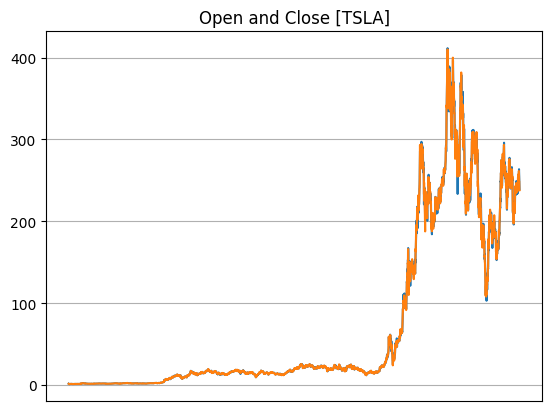

In [157]:
plt.figure(1);
plt.plot(df_TSLA.index, df_TSLA['Open'],df_TSLA.index,df_TSLA['Close']);plt.title("Open and Close [TSLA]"); 
frame1 = plt.gca();
frame1.axes.get_xaxis().set_visible(False)
plt.grid()
# plt.figure(2);
# plt.plot(df_AAPL.index, df_AAPL['Open'],df_AAPL.index,df_AAPL['Close']);plt.title("Open and Close [AAPL]");#df_AAPL
# frame2 = plt.gca();
# frame2.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(3);
# plt.plot(df_ABNB.index, df_ABNB['Open'],df_ABNB.index,df_ABNB['Close']);plt.title("Open and Close [ABNB]");#df_ABNB
# frame3 = plt.gca();
# frame3.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(4);
# plt.plot(df_AMZN.index, df_AMZN['Open'],df_AMZN.index,df_AMZN['Close']);plt.title("Open and Close [AMZN]");#df_AMZN
# frame4 = plt.gca();
# frame4.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(5);
# plt.plot(df_BTC.index, df_BTC['Open'],df_BTC.index,df_BTC['Close']);plt.title("Open and Close [BTC]");#df_BTC
# frame5 = plt.gca();
# frame5.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(6);
# plt.plot(df_FDX.index, df_FDX['Open'],df_FDX.index,df_FDX['Close']);plt.title("Open and Close [FDX]");#df_FDX
# frame6 = plt.gca();
# frame6.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(7);
# plt.plot(df_IBM.index, df_IBM['Open'],df_IBM.index,df_IBM['Close']);plt.title("Open and Close [IBM]");#df_IBM
# frame7 = plt.gca();
# frame7.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(8);
# plt.plot(df_MSFT.index, df_MSFT['Open'],df_MSFT.index,df_MSFT['Close']);plt.title("Open and Close [MSFT]");#df_MSFT
# frame8 = plt.gca();
# frame8.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(9);
# plt.plot(df_NVDA.index, df_NVDA['Open'],df_NVDA.index,df_NVDA['Close']);plt.title("Open and Close [NVDA]");#df_NVDA
# frame9 = plt.gca();
# frame9.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(10);
# plt.plot(df_ORCL.index, df_ORCL['Open'],df_ORCL.index,df_ORCL['Close']);plt.title("Open and Close [ORCL]");#df_ORCL
# frame10 = plt.gca();
# frame10.axes.get_xaxis().set_visible(False)
# plt.grid()
# plt.figure(11);
# plt.plot(df_GOOG.index, df_GOOG['Open'],df_GOOG.index,df_GOOG['Close']);plt.title("Open and Close [GOOG]");#df_ORCL
# frame10 = plt.gca();
# frame10.axes.get_xaxis().set_visible(False)
# plt.grid()

<Figure size 640x480 with 0 Axes>

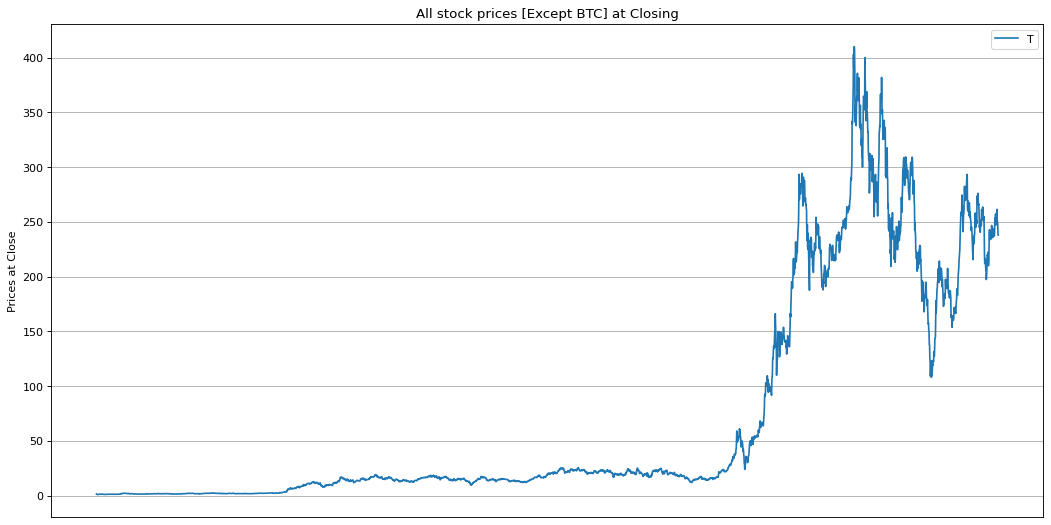

In [158]:
plt.figure(1);

figure(figsize=(16, 8), dpi=80)
plt.plot(df_TSLA.index, df_TSLA['Close'],
        # df_AAPL.index, df_AAPL['Close'],
        # df_ABNB.index, df_ABNB['Close'],
        # df_AMZN.index, df_AMZN['Close'],
        # #df_BTC.index, df_BTC['Close'],
        # df_FDX.index, df_FDX['Close'],
        # df_IBM.index, df_IBM['Close'],
        # df_MSFT.index, df_MSFT['Close'],
        # df_NVDA.index, df_NVDA['Close'],
        # df_ORCL.index, df_ORCL['Close'],
        # df_GOOG.index, df_GOOG['Close']
        );
    
plt.title("All stock prices [Except BTC] at Closing"); plt.ylabel('Prices at Close'); 
#plt.legend(['TSLA','AAPL','ABNB','AMZN','FDX','IBM','MSFT','NVDA','ORCL','GOOG'])
plt.legend("TESLA")
frame1 = plt.gca();
frame1.axes.get_xaxis().set_visible(False);
plt.grid();
plt.show()

In [159]:
# plt.figure(1);

# figure(figsize=(16, 8), dpi=80)
# plt.plot(#df_TSLA.index, df_TSLA['Close'],
#         #df_AAPL.index, df_AAPL['Close'],
#         #df_ABNB.index, df_ABNB['Close'],
#         #df_AMZN.index, df_AMZN['Close'],
#         df_BTC.index, df_BTC['Close'],
#         #df_FDX.index, df_FDX['Close'],
#         #df_IBM.index, df_IBM['Close'],
#         #df_MSFT.index, df_MSFT['Close'],
#         #df_NVDA.index, df_NVDA['Close'],
#         #df_ORCL.index, df_ORCL['Close']
#         );
    
# plt.title("Only BTC at Closing"); plt.ylabel('Prices at Close'); 
# plt.legend(['BTC'])
# frame1 = plt.gca();
# frame1.axes.get_xaxis().set_visible(False);
# plt.grid();
# plt.show()

In [160]:
def drop_col(df):
    df = df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True);
    return df;

drop_col(df_TSLA)
# drop_col(df_AAPL)
# drop_col(df_ABNB)
# drop_col(df_AMZN)
# drop_col(df_BTC)
# drop_col(df_FDX)
# drop_col(df_IBM)
# drop_col(df_MSFT)
# drop_col(df_NVDA)
# drop_col(df_ORCL)

In [173]:
def pred(df,df_future,df_comp):
    close_data = df['Close'].values
    close_data = close_data.reshape((-1,1));

    split_percent = 0.80;
    split = int(split_percent*len(close_data));

    close_train = close_data[:split];
    close_test = close_data[split:];

    date_train = df['Date'][:split];
    date_test = df['Date'][split:];

    #print(len(close_train));
    #print(len(close_test));
    ## You should get that the train and testing sets have been split 
    ## into 80% train and 20% test

    look_back = 5;

    train_generator = TimeseriesGenerator(close_train, close_train, length = look_back, batch_size = 200);
    test_generator = TimeseriesGenerator(close_test, close_test, length = look_back, batch_size = 200);

    model = Sequential()
    model.add(
        LSTM(30,
            activation='LeakyReLU',
            input_shape=(look_back,1))
    )
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    num_epochs = 100;
    model.fit(train_generator, epochs=num_epochs, verbose=1)
    prediction = model.predict(test_generator)

    close_train = close_train.reshape((-1))
    close_test = close_test.reshape((-1))
    prediction = prediction.reshape((-1))

    close_data = close_data.reshape((-1));

    def predict(num_prediction, model):
        prediction_list = close_data[-look_back:];
    
        for _ in range(num_prediction):
            x = prediction_list[-look_back:];
            x = x.reshape((1, look_back, 1));
            out = model.predict(x)[0][0];
            prediction_list = np.append(prediction_list, out);
        prediction_list = prediction_list[look_back-1:];
        
        return prediction_list;
    
    def predict_dates(num_prediction):
        last_date = df['Date'].values[-1];
        prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist();
        return prediction_dates;

    num_prediction = 5;
    forecast = predict(num_prediction, model);
    forecast_dates = predict_dates(num_prediction);
    trace1 = go.Scatter(
        x = date_train,
        y = close_train,
        mode = 'lines',
        name = 'Training Data'
    )
    trace2 = go.Scatter(
        x = date_test,
        y = prediction,
        mode = 'lines',
        name = 'Testing Training Data'
    )
    trace3 = go.Scatter(
        x = date_test,
        y = close_test,
        mode='lines',
        name = 'Historical Data'
    )
    if (df is df_TSLA):
        name = "TSLA"
    # elif(df is df_AAPL):
    #     name = "AAPL"
    # elif(df is df_ABNB):
    #     name = "ABNB"
    # elif(df is df_AMZN):
    #     name = "AMZN"
    # elif(df is df_BTC):
    #     name = "BTC"
    # elif(df is df_FDX):
    #     name = "FDX"
    # elif(df is df_IBM):
    #     name = "IBM"
    # elif(df is df_MSFT):
    #     name = "MSFT"
    # elif(df is df_NVDA):
    #     name = "NVDA"
    # elif(df is df_ORCL):
    #     name = "ORCL"
    # elif(df is df_GOOG):
    #     name = "GOOG"
    # else:
    #     name = ""
    layout = go.Layout(
        title = ("Simple LSTM forecast using " + name + " Stock"),
        font = dict(size = 20),
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Close"}
    )
    fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
    fig.show()
    test_r2_score = r2_score(close_test[0:len(close_test)-look_back],prediction)
    print("The R2_score of this Training-Testing model is:",test_r2_score)
    trace1 = go.Scatter(
        x = forecast_dates,
        y = forecast,
        mode = 'lines',
        name = 'Forecast'
    )
    trace2 = go.Scatter(
        x = df_comp['Date'],
        y = df_comp['Close'],
        mode = 'lines',
        name = 'Actual 30-Day Data'
    )
    layout = go.Layout(
        title = ("Simple LSTM 5-Day forecast using " + name + " Stock"),
        font = dict(size = 20),
        xaxis = {'title' : "Date"},
        yaxis = {'title' : "Close"},
        height = 800
    )
    fig = go.Figure(data=[trace1,trace2, trace3], layout=layout);
    fig.show();
    df_r2_score = r2_score(df_comp['Close'], forecast)
    print("The R2_score of this prediction model is:",df_r2_score)

In [174]:
df_TSLA = pd.read_csv(r'C:\Users\emili\Downloads\Forecasting_Stocks_LSTM_Sentiment_Transformer_Federated_Learning\LSTM_Simple_Comparative_Analysis\Updated Version\TSLA.csv');#, index_col = 'Date', parse_dates = True)#, index_col = 'Date')
# df_AAPL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AAPL.csv')#, index_col = 'Date')
# df_ABNB = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ABNB.csv')#, index_col = 'Date')
# df_AMZN = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\AMZN.csv')#, index_col = 'Date')
# df_BTC = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\BTC-USD.csv', parse_dates = True)#, index_col = 'Date')
# df_FDX = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\FDX.csv')#, index_col = 'Date')
# df_IBM = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\IBM.csv')#, index_col = 'Date')
# df_MSFT = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\MSFT.csv')#, index_col = 'Date')
# df_NVDA = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\NVDA.csv')#, index_col = 'Date')
# df_ORCL = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\ORCL.csv')#, index_col = 'Date')
# df_GOOG = pd.read_csv(r'C:\Users\emili\Downloads\Machine_Learning_SP_Course\Machine_Learning_Project\GOOG.csv')#, index_col = 'Date')

In [175]:
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500
...,...,...,...,...,...,...,...
3397,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
3398,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
3399,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
3400,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600


In [176]:
df_TSLA = df_TSLA.drop(labels=range(0, len(df_TSLA.index)-127), axis=0) #127
# df_AAPL = df_AAPL.drop(labels=range(0, len(df_AAPL.index)-127), axis=0)
# df_ABNB = df_ABNB.drop(labels=range(0, len(df_ABNB.index)-127), axis=0)
# df_AMZN = df_AMZN.drop(labels=range(0, len(df_AMZN.index)-127), axis=0)
# df_BTC = df_BTC.drop(labels=range(0, len(df_BTC.index)-127), axis=0)
# df_FDX = df_FDX.drop(labels=range(0, len(df_FDX.index)-127), axis=0)
# df_IBM = df_IBM.drop(labels=range(0, len(df_IBM.index)-127), axis=0)
# df_MSFT = df_MSFT.drop(labels=range(0, len(df_MSFT.index)-127), axis=0)
# df_NVDA = df_NVDA.drop(labels=range(0, len(df_NVDA.index)-127), axis=0)
# df_ORCL = df_ORCL.drop(labels=range(0, len(df_ORCL.index)-127), axis=0)
# df_GOOG = df_GOOG.drop(labels=range(0, len(df_GOOG.index)-127), axis=0)

In [177]:
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date']);

In [178]:
# df_BTC['Date'] = pd.to_datetime(df_BTC['Date']);
# df_BTC.set_index('Date', inplace=True)

In [179]:
# df_BTC

In [180]:
# df_BTC.plot();

In [181]:
# df_BTC.index.freq = 'd'
# #df_BTC.index.asfreq('MS')
# from statsmodels.tsa.seasonal import seasonal_decompose
# results = seasonal_decompose(df_BTC['Close'])
# results.plot().set_size_inches((16,9))

In [182]:
df_TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
3275,2023-07-06,278.089996,279.970001,272.880005,276.540009,276.540009,120332100
3276,2023-07-07,278.429993,280.779999,273.769989,274.429993,274.429993,113602000
3277,2023-07-10,276.470001,277.519989,265.100006,269.609985,269.609985,119425400
3278,2023-07-11,268.649994,270.899994,266.369995,269.790009,269.790009,91972400
3279,2023-07-12,276.329987,276.519989,271.459991,271.989990,271.989990,95672100
...,...,...,...,...,...,...,...
3397,2023-12-28,263.660004,265.130005,252.710007,253.179993,253.179993,113619900
3398,2023-12-29,255.100006,255.190002,247.429993,248.479996,248.479996,100615300
3399,2024-01-02,250.080002,251.250000,244.410004,248.419998,248.419998,104654200
3400,2024-01-03,244.979996,245.679993,236.320007,238.449997,238.449997,121082600


In [183]:
df_TSLA_comp['Date'] = pd.to_datetime(df_TSLA_comp['Date']);

In [189]:
pred(df_TSLA,df_TSLA_future,df_TSLA_comp)

Epoch 1/100
1/1 [==============================] - 1s 911ms/step - loss: 62284.4492
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 61941.0508
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 61581.0000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 61203.5625
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 60791.6758
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 60268.8555
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 59691.0781
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 59077.2852
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 58425.6367
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 57716.3320
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 56942.8242
Epoch 12/100
1/1 [==============================] - 0s 13ms/step - loss: 56070.8789


The R2_score of this Training-Testing model is: -0.2462576663333933


The R2_score of this prediction model is: 0.39693539681274426


In [194]:
pred(df_TSLA,df_TSLA_future,df_TSLA_comp)

Epoch 1/100
1/1 [==============================] - 1s 951ms/step - loss: 42524.5625
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 41455.5977
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 40249.2578
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 38789.4453
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 37011.7383
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 35036.0391
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 33041.9258
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 31070.7363
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 29157.8594
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 27289.2520
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 25413.1543
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 23612.9746


The R2_score of this Training-Testing model is: 0.2802391893060868


The R2_score of this prediction model is: -9.233493391268885


In [196]:
pred(df_TSLA,df_TSLA_future,df_TSLA_comp)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 92565.6875
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 83262.7344
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 80590.7500
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 78665.3438
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 76941.2812
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 75361.3203
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 73835.9688
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 72323.4844
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 70832.9219
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 69343.4062
Epoch 11/100
1/1 [==============================] - 0s 17ms/step - loss: 67808.0000
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 66173.7891
Epo

The R2_score of this Training-Testing model is: -0.1460163385137656


The R2_score of this prediction model is: -9.817843251178962


In [197]:
pred(df_TSLA,df_TSLA_future,df_TSLA_comp)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 77512.2500
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 72976.5234
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 67017.0000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 60744.7383
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 55541.9570
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 51482.4219
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 49461.0430
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 44862.4062
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 18731.3105
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 14137.5703
Epoch 11/100
1/1 [==============================] - 0s 18ms/step - loss: 13350.7412
Epoch 12/100
1/1 [==============================] - 0s 18ms/step - loss: 12633.3779
Epo

The R2_score of this Training-Testing model is: 0.4500172578720013


The R2_score of this prediction model is: -5.875694367278168


In [198]:
pred(df_TSLA,df_TSLA_future,df_TSLA_comp)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 63082.6133
Epoch 2/100
1/1 [==============================] - 0s 33ms/step - loss: 60245.5625
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 54320.3633
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 45532.3281
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 37713.3398
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 33959.0000
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 32614.7031
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 32087.5059
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 31743.6816
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 31375.4551
Epoch 11/100
1/1 [==============================] - 0s 15ms/step - loss: 30935.0645
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 30428.1562
Epo

The R2_score of this Training-Testing model is: -0.47942092824935645


The R2_score of this prediction model is: -1.056943172654981


In [76]:
pred(df_IBM,df_IBM_future,df_IBM_comp)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 19173.9121
Epoch 2/100
1/1 [==============================] - 0s 61ms/step - loss: 19090.4785
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 19004.4062
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 18915.8691
Epoch 5/100
1/1 [==============================] - 0s 36ms/step - loss: 18825.1113
Epoch 6/100
1/1 [==============================] - 0s 33ms/step - loss: 18732.4043
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 18638.0488
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 18542.3223
Epoch 9/100
1/1 [==============================] - 0s 45ms/step - loss: 18445.4902
Epoch 10/100
1/1 [==============================] - 0s 44ms/step - loss: 18347.7559
Epoch 11/100
1/1 [==============================] - 0s 40ms/step - loss: 18249.2715
Epoch 12/100
1/1 [==============================] - 0s 39ms/step - loss: 18150.1387
Epo

1/1 [==============================] - 0s 135ms/step


The R2_score of this Training-Testing model is: 0.6705868002986524


The R2_score of this prediction model is: 0.5000167634330945


In [47]:
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK
##### BREAK

In [48]:
pred(df_AAPL,df_AAPL_future,df_AAPL_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16543.4414
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 16023.9639
Epoch 3/100
1/1 [==============================] - 0s 24ms/step - loss: 15518.5889
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 15025.1943
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 14548.4912
Epoch 6/100
1/1 [==============================] - 0s 27ms/step - loss: 14102.0303
Epoch 7/100
1/1 [==============================] - 0s 20ms/step - loss: 13662.8955
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 13226.1709
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 12799.7998
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 12423.6836
Epoch 11/100
1/1 [==============================] - 0s 23ms/step - loss: 12056.7412
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 11699.6064
Epo

1/1 [==============================] - 0s 29ms/step


The R2_score of this Training-Testing model is: 0.5627958148704713


The R2_score of this prediction model is: -0.5604948444746252


In [49]:
pred(df_ABNB,df_ABNB_future,df_ABNB_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 14462.9814
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 14255.3838
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 14049.4111
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 13843.7393
Epoch 5/100
1/1 [==============================] - 0s 24ms/step - loss: 13636.6602
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 13426.0352
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 13209.3389
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 12983.7451
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 12746.4424
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 12495.3477
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 12230.0615
Epoch 12/100
1/1 [==============================] - 0s 23ms/step - loss: 11952.3545
Epo

1/1 [==============================] - 0s 28ms/step


The R2_score of this Training-Testing model is: 0.3860500098241322


The R2_score of this prediction model is: -2.5575132952554496


In [50]:
pred(df_AMZN,df_AMZN_future,df_AMZN_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 22075.8379
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 21592.6484
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 21290.4043
Epoch 4/100
1/1 [==============================] - 0s 25ms/step - loss: 20893.4141
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 20455.5117
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 20032.0859
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 19616.7617
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 19188.6230
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 18739.6738
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 18274.9199
Epoch 11/100
1/1 [==============================] - 0s 22ms/step - loss: 17801.0020
Epoch 12/100
1/1 [==============================] - 0s 22ms/step - loss: 17314.6270
Epo

1/1 [==============================] - 0s 28ms/step


The R2_score of this Training-Testing model is: 0.5621663608837568


The R2_score of this prediction model is: -3.7769173043243223


In [51]:
#pred(df_BTC,df_BTC_future,df_BTC_comp)

In [52]:
pred(df_FDX,df_FDX_future,df_FDX_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 50853.9844
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 50649.4492
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 50440.3008
Epoch 4/100
1/1 [==============================] - 0s 21ms/step - loss: 50225.1133
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 50002.5977
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 49771.9688
Epoch 7/100
1/1 [==============================] - 0s 23ms/step - loss: 49533.5430
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 49289.3711
Epoch 9/100
1/1 [==============================] - 0s 25ms/step - loss: 49043.7070
Epoch 10/100
1/1 [==============================] - 0s 25ms/step - loss: 48802.5586
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss: 48571.8867
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 48355.4531
Epo

1/1 [==============================] - 0s 26ms/step


The R2_score of this Training-Testing model is: 0.8575655001301629


The R2_score of this prediction model is: -4.6329850946931685


In [53]:
pred(df_IBM,df_IBM_future,df_IBM_comp)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 15288.2529
Epoch 2/100
1/1 [==============================] - 0s 25ms/step - loss: 15140.9727
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 14995.9297
Epoch 4/100
1/1 [==============================] - 0s 22ms/step - loss: 14851.4639
Epoch 5/100
1/1 [==============================] - 0s 22ms/step - loss: 14705.8252
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 14557.1260
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 14403.2920
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 14242.0088
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 14070.6992
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 13886.5713
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 13686.8018
Epoch 12/100
1/1 [==============================] - 0s 24ms/step - loss: 13468.9092
Epo

1/1 [==============================] - 0s 29ms/step


The R2_score of this Training-Testing model is: -0.05753123077949507


The R2_score of this prediction model is: -6.788931535765564


In [54]:
pred(df_MSFT,df_MSFT_future,df_MSFT_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 61824.8906
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 61142.8555
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 60455.1055
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 59746.2031
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 58988.4180
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 58143.8008
Epoch 7/100
1/1 [==============================] - 0s 22ms/step - loss: 57184.5820
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 56133.8555
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 55064.8750
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 54010.4492
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 52953.3633
Epoch 12/100
1/1 [==============================] - 0s 28ms/step - loss: 51907.0352
Epo

1/1 [==============================] - 0s 23ms/step - loss: 76.3846
Epoch 100/100
1/1 [==============================] - 0s 29ms/step


The R2_score of this Training-Testing model is: 0.8086375466876355


The R2_score of this prediction model is: -1.240418870088107


In [55]:
pred(df_NVDA,df_NVDA_future,df_NVDA_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 38258.1406
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 38108.8359
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 37972.1484
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 37845.2852
Epoch 5/100
1/1 [==============================] - 0s 37ms/step - loss: 37725.8398
Epoch 6/100
1/1 [==============================] - 0s 30ms/step - loss: 37611.8320
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 37501.6211
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 37393.8555
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 37287.3867
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 37181.2148
Epoch 11/100
1/1 [==============================] - 0s 21ms/step - loss: 37074.3789
Epoch 12/100
1/1 [==============================] - 0s 21ms/step - loss: 36965.9609
Epo

1/1 [==============================] - 0s 22ms/step - loss: 293.0255
Epoch 100/100
1/1 [==============================] - 0s 29ms/step


The R2_score of this Training-Testing model is: -0.8931271443726176


The R2_score of this prediction model is: -27.490841582230047


In [56]:
pred(df_ORCL,df_ORCL_future,df_ORCL_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 3971.4502
Epoch 2/100
1/1 [==============================] - 0s 23ms/step - loss: 3499.2336
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 3081.9480
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 2722.2249
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 2411.3809
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 2138.8750
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 1896.2054
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 1678.2555
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 1481.7526
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 1304.0260
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss: 1143.4484
Epoch 12/100
1/1 [==============================] - 0s 20ms/step - loss: 998.4202
Epoch 13/100
1/1

1/1 [==============================] - 0s 26ms/step


The R2_score of this Training-Testing model is: 0.8149749281204708


The R2_score of this prediction model is: -3.909713735702608


In [57]:
pred(df_GOOG,df_GOOG_future,df_GOOG_comp)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 16261.7422
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 15825.9336
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 15427.7109
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 15113.7900
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 14892.6533
Epoch 6/100
1/1 [==============================] - 0s 24ms/step - loss: 14738.4961
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 14612.8516
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 14480.0820
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 14313.2939
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 14096.1094
Epoch 11/100
1/1 [==============================] - 0s 24ms/step - loss: 13824.4248
Epoch 12/100
1/1 [==============================] - 0s 30ms/step - loss: 13507.9189
Epo

1/1 [==============================] - 0s 27ms/step


The R2_score of this Training-Testing model is: 0.7639479410955724


The R2_score of this prediction model is: 0.3410869391087966
